In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from sklearn.svm import SVC
from minisom import MiniSom
from sklearn import datasets
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
from sklearn.manifold import TSNE
from collections import defaultdict
from tensorflow.keras import layers
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans, DBSCAN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from yellowbrick.cluster import KElbowVisualizer
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import InterclusterDistance
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.datasets import make_blobs, make_circles, make_s_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score ,ConfusionMatrixDisplay,classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


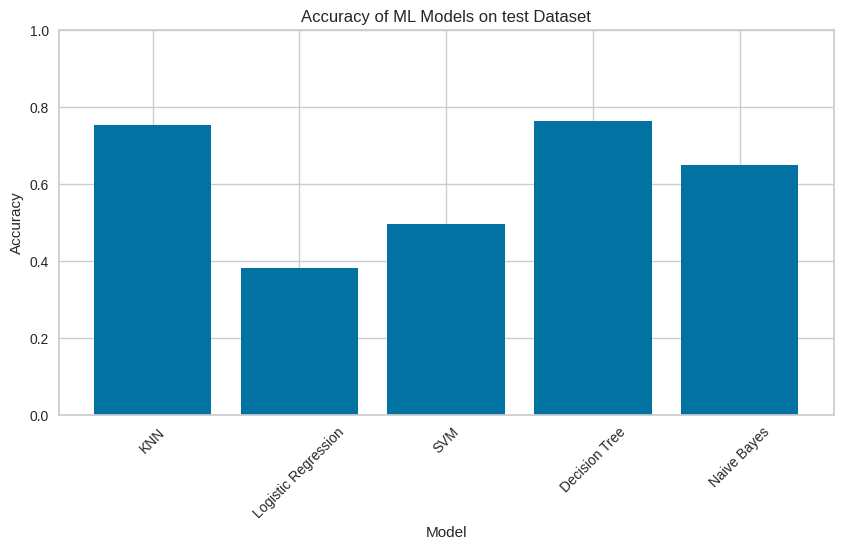

The models accuracies are:
The accuracy of KNN on the test dataset is 0.75.
The accuracy of Logistic Regression on the test dataset is 0.38.
The accuracy of SVM on the test dataset is 0.50.
The accuracy of Decision Tree on the test dataset is 0.76.
The accuracy of Naive Bayes on the test dataset is 0.65.
*************************
The best two models are: Decision Tree, KNN
The accuracy of Decision Tree on the test dataset is 0.76.
The accuracy of KNN on the test dataset is 0.75.


In [ ]:

# Load the training dataset
train_dataset = pd.read_csv('/content/training_dataset.csv')

# Split features and labels for training
X_train = train_dataset.drop('Cover_Type', axis=1)
y_train = train_dataset['Cover_Type']

# Load the validation dataset
val_dataset = pd.read_csv('/content/validation_dataset.csv')

# Split features and labels for validation
X_val = val_dataset.drop('Cover_Type', axis=1)
y_val = val_dataset['Cover_Type']

# Load the test dataset
test_dataset = pd.read_csv('/content/test_dataset.csv')

# Split features and labels for test
X_test = test_dataset.drop('Cover_Type', axis=1)
y_test = test_dataset['Cover_Type']

# Initialize the models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and validate each model, then evaluate on the test dataset
accuracy_scores = {}
accuracy_scores_val = {}
confusion_matrices = {}
confusion_matrices_val = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

for model_name, model in models.items():
    # model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy_scores_val[model_name] = accuracy_score(y_val, y_val_pred)
    confusion_matrices_val[model_name] = confusion_matrix(y_val, y_val_pred)



# Select the best two models based on test accuracy
best_model_names = sorted(accuracy_scores, key=accuracy_scores.get, reverse=True)[:2]
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Evaluate the best two models on the test dataset
test_accuracies = {}

for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_accuracies[model_name] = accuracy_score(y_test, y_test_pred)

all_test_accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    all_test_accuracies[model_name] = accuracy_score(y_test, y_test_pred)

# Plot the accuracy scores for all models on the test dataset
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of ML Models on test Dataset')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


print(f"The models accuracies are:")
for model_name, accuracy in all_test_accuracies.items():
    print(f"The accuracy of {model_name} on the test dataset is {accuracy:.2f}.")

print("*************************")



print(f"The best two models are: {', '.join(best_model_names)}")
for model_name, accuracy in test_accuracies.items():
    print(f"The accuracy of {model_name} on the test dataset is {accuracy:.2f}.")





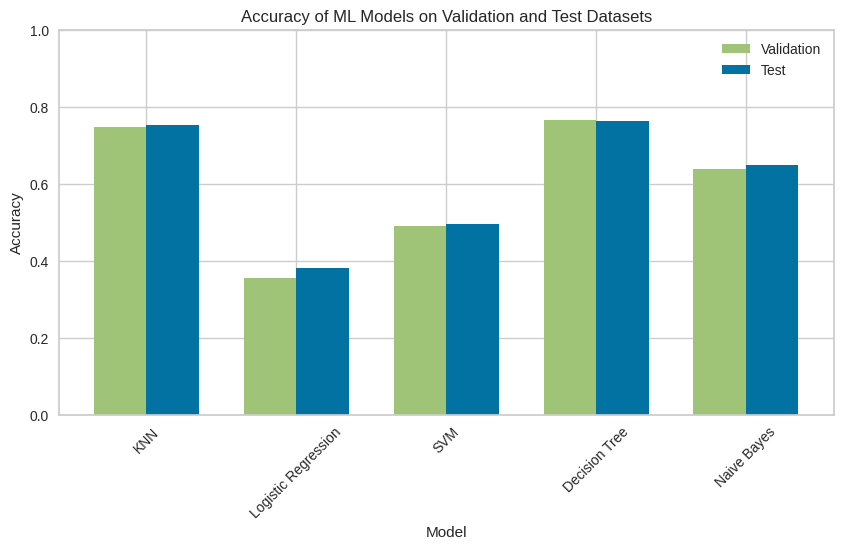

<Figure size 800x600 with 0 Axes>

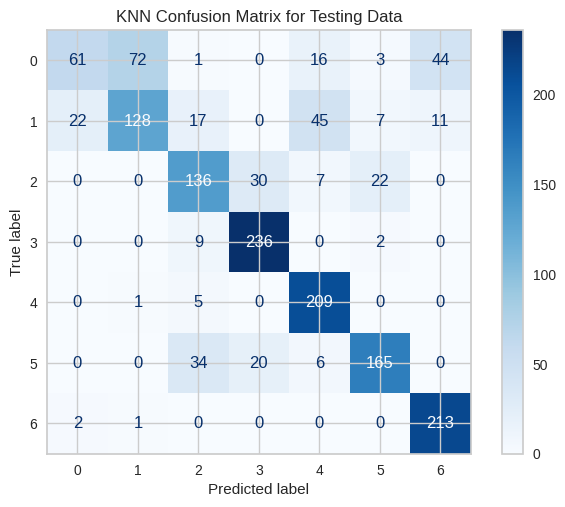

<Figure size 800x600 with 0 Axes>

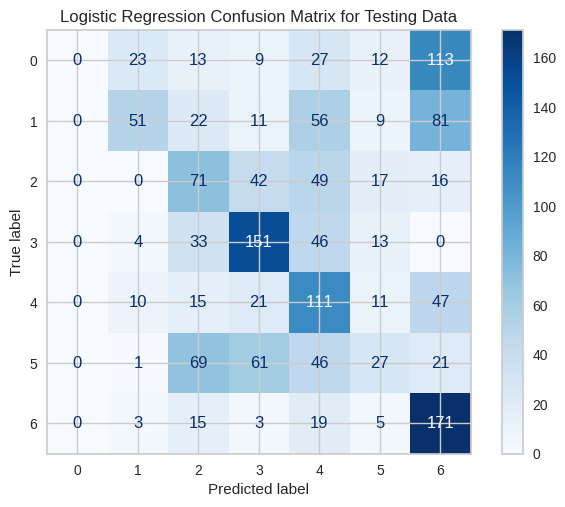

<Figure size 800x600 with 0 Axes>

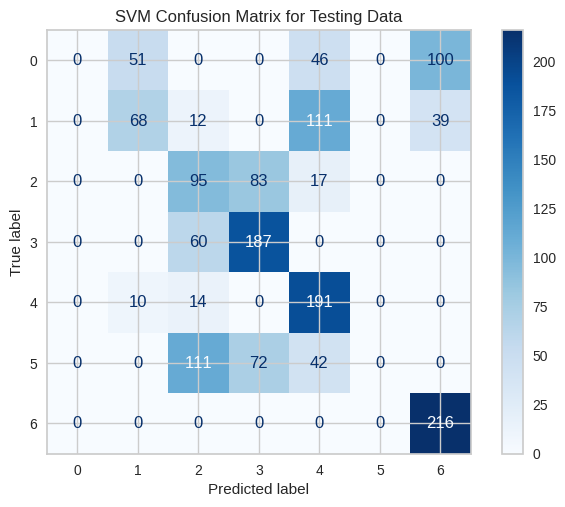

<Figure size 800x600 with 0 Axes>

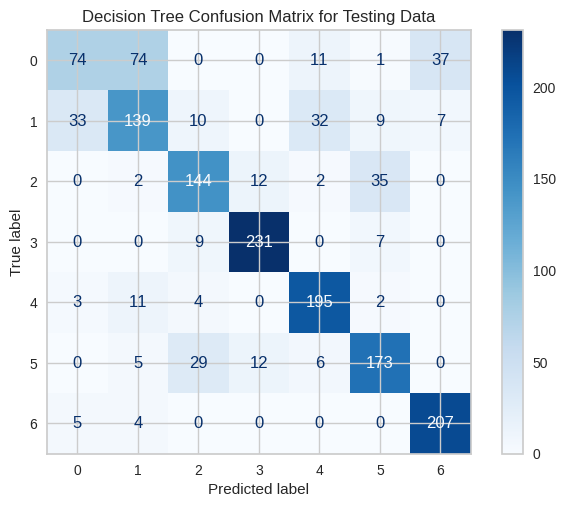

<Figure size 800x600 with 0 Axes>

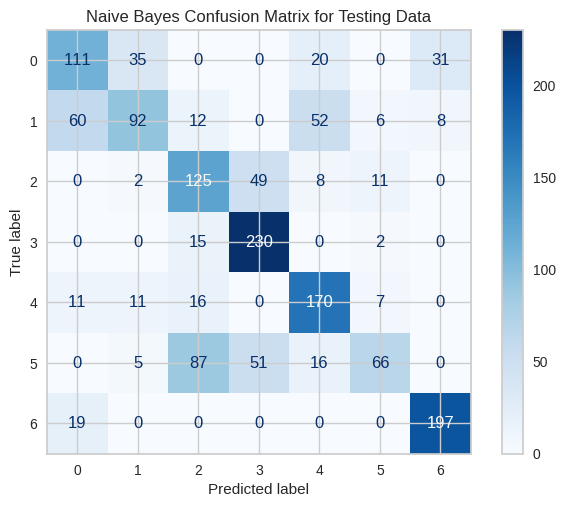

<Figure size 800x600 with 0 Axes>

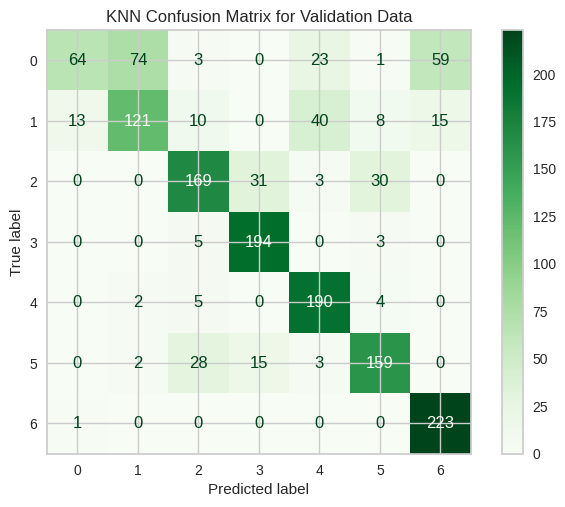

<Figure size 800x600 with 0 Axes>

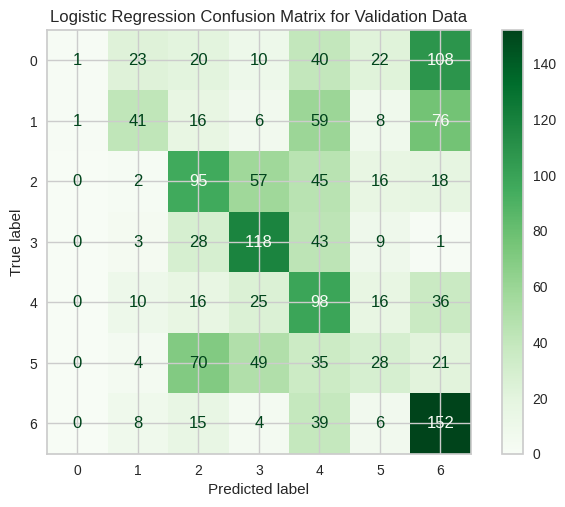

<Figure size 800x600 with 0 Axes>

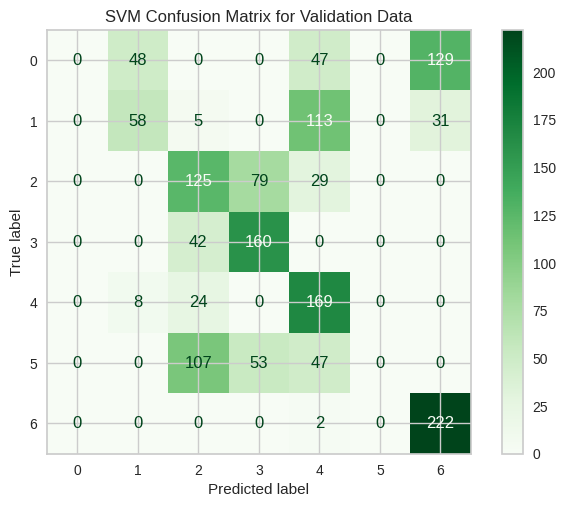

<Figure size 800x600 with 0 Axes>

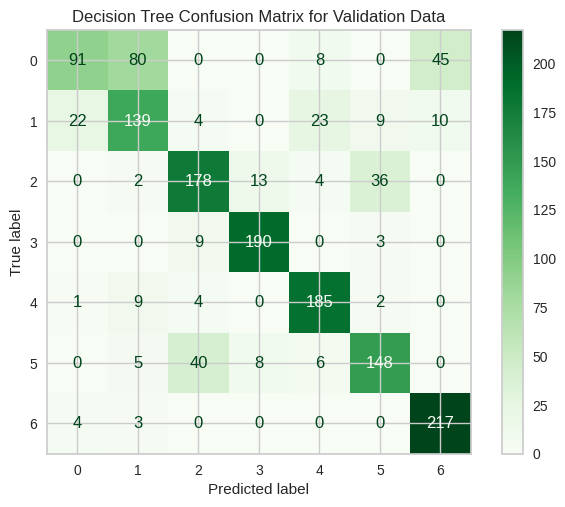

<Figure size 800x600 with 0 Axes>

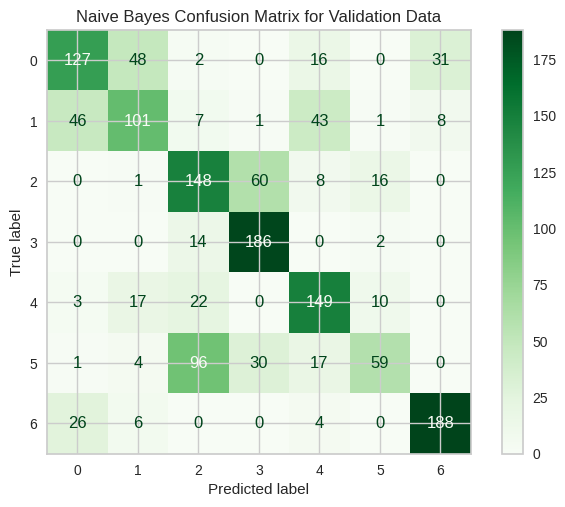

In [ ]:
bar_width = 0.35

# Setting the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar chart
plt.figure(figsize=(10, 5))
plt.bar(r1, [accuracy_scores_val.get(model, 0) for model in models], color='g', width=bar_width, label='Validation')
plt.bar(r2, [accuracy_scores.get(model, 0) for model in models], color='b', width=bar_width, label='Test')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of ML Models on Validation and Test Datasets')
plt.ylim(0, 1)
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.legend()
plt.show()


for model_name, model in models.items():

    # Get the predicted labels using the model on the training data
    y_pred_test = model.predict(X_test)
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Create the ConfusionMatrixDisplay object with custom labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'{model_name} Confusion Matrix for Testing Data')
    plt.show()


for model_name, model in models.items():

    # Get the predicted labels using the model on the training data
    y_pred_validation = model.predict(X_val)
    # Calculate the confusion matrix
    cm = confusion_matrix(y_val, y_pred_validation)

    # Create the ConfusionMatrixDisplay object with custom labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Greens', values_format='d')
    plt.title(f'{model_name} Confusion Matrix for Validation Data')
    plt.show()








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE

# Load the training dataset
train_dataset = pd.read_csv('/content/training_dataset.csv')

# Split features and labels for training
X_train = train_dataset.drop('Cover_Type', axis=1)
y_train = train_dataset['Cover_Type']

# Load the validation dataset
val_dataset = pd.read_csv('/content/validation_dataset.csv')

# Split features and labels for validation
X_val = val_dataset.drop('Cover_Type', axis=1)
y_val = val_dataset['Cover_Type']

# Load the test dataset
test_dataset = pd.read_csv('/content/test_dataset.csv')

# Split features and labels for test
X_test = test_dataset.drop('Cover_Type', axis=1)
y_test = test_dataset['Cover_Type']

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and validate each model, then evaluate on the test dataset
accuracy_scores = {}
confusion_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    accuracy_scores[model_name] = accuracy_score(y_test, y_test_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_test_pred)

# Select the best two models based on test accuracy
best_model_names = sorted(accuracy_scores, key=accuracy_scores.get, reverse=True)[:2]
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Evaluate the best two models on the test dataset
test_accuracies = {}
num_features = X_train.shape[1]

for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_accuracies[model_name] = accuracy_score(y_test, y_test_pred)

In [ ]:
# Perform feature selection using filter-based (SelectKBest) approach
filter_accuracy_scores = {}
filter_best_k = None

best_acc_knn_filter = 0
best_acc_dt_filter = 0
best_X_filter_train_dt = []
best_X_filter_test_dt = []
best_X_filter_val_dt = []

best_X_filter_train_knn = []
best_X_filter_test_knn = []
best_X_filter_val_knn = []

best_acc_knn_wrapper = 0
best_acc_dt_wrapper = 0
best_X_wrapper_train_knn = []
best_X_wrapper_test_knn = []
best_X_wrapper_val_knn = []

best_X_wrapper_train_dt = []
best_X_wrapper_test_dt = []
best_X_wrapper_val_dt = []

filtered_best_model_knn=[]
filtered_best_model_dt=[]
wrapped_best_model_knn=[]
wrapped_best_model_dt=[]

for k in range(1, num_features + 1):

    selector = SelectKBest(f_classif, k=k)
    X_train_filtered = selector.fit_transform(X_train, y_train)
    X_test_filtered = selector.transform(X_test)
    X_val_filtered = selector.transform(X_val)

    for model_name, model in best_models.items():
        model.fit(X_train_filtered, y_train)
        y_test_pred = model.predict(X_test_filtered)
        accuracy_score_key = f'{model_name}_k={k}'
        filter_accuracy_scores[accuracy_score_key] = accuracy_score(y_test, y_test_pred)
        if  (accuracy_score(y_test, y_test_pred) > best_acc_knn_filter) and model_name == "KNN" :
          best_acc_knn_filter = accuracy_score(y_test, y_test_pred)
          best_X_filter_train_knn = np.copy(X_train_filtered)
          best_X_filter_test_knn = np.copy(X_test_filtered)
          best_X_filter_val_knn =  np.copy(X_val_filtered)
          filtered_best_model_knn=clone(model)
        elif (accuracy_score(y_test, y_test_pred) > best_acc_dt_filter) and model_name == "Decision Tree":
          best_acc_dt_filter = accuracy_score(y_test, y_test_pred)
          best_X_filter_train_dt = np.copy(X_train_filtered)
          best_X_filter_test_dt =np.copy(X_test_filtered)
          best_X_filter_val_dt = np.copy(X_val_filtered)
          filtered_best_model_dt=clone(model)




    if k == num_features:  # Store the best k for the wrapper-based approach
        filter_best_k = max(filter_accuracy_scores, key=filter_accuracy_scores.get)

# Perform feature selection using wrapper-based (Recursive Feature Elimination) approach
wrapper_accuracy_scores = {}
for k in range(1, num_features + 1):
    selector = RFE(best_models[filter_best_k.split('_')[0]], n_features_to_select=k)
    X_train_wrapped = selector.fit_transform(X_train, y_train)
    X_test_wrapped = selector.transform(X_test)
    X_val_wrapped = selector.transform(X_test)

    for model_name, model in best_models.items():
        model.fit(X_train_wrapped, y_train)
        y_test_pred = model.predict(X_test_wrapped)
        accuracy_score_key = f'{model_name}_k={k}'
        wrapper_accuracy_scores[accuracy_score_key] = accuracy_score(y_test, y_test_pred)

        if  (accuracy_score(y_test, y_test_pred) > best_acc_knn_wrapper ) and model_name == "KNN":
          best_acc_knn_wrapper = accuracy_score(y_test, y_test_pred)
          best_X_wrapper_train_knn =np.copy( X_train_wrapped)
          best_X_wrapper_test_knn = np.copy(X_test_wrapped)
          best_X_wrapper_val_knn = np.copy(X_val_wrapped)
          wrapped_best_model_knn=clone(model)

        elif  (accuracy_score(y_test, y_test_pred) > best_acc_dt_wrapper ) and model_name == "Decision Tree":
          best_acc_dt_wrapper = accuracy_score(y_test, y_test_pred)
          best_X_wrapper_train_dt = np.copy(X_train_wrapped)
          best_X_wrapper_test_dt = np.copy(X_test_wrapped)
          best_X_wrapper_val_dt = np.copy(X_val_wrapped)
          wrapped_best_model_dt=clone(model)

print (filter_accuracy_scores)
print (wrapper_accuracy_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarni

{'Decision Tree_k=1': 0.519344262295082, 'KNN_k=1': 0.5062295081967213, 'Decision Tree_k=2': 0.520655737704918, 'KNN_k=2': 0.5075409836065574, 'Decision Tree_k=3': 0.5652459016393443, 'KNN_k=3': 0.5855737704918033, 'Decision Tree_k=4': 0.6098360655737705, 'KNN_k=4': 0.5862295081967213, 'Decision Tree_k=5': 0.6334426229508197, 'KNN_k=5': 0.5862295081967213, 'Decision Tree_k=6': 0.6511475409836066, 'KNN_k=6': 0.5862295081967213, 'Decision Tree_k=7': 0.718688524590164, 'KNN_k=7': 0.68, 'Decision Tree_k=8': 0.7140983606557377, 'KNN_k=8': 0.68, 'Decision Tree_k=9': 0.7147540983606557, 'KNN_k=9': 0.68, 'Decision Tree_k=10': 0.7160655737704918, 'KNN_k=10': 0.68, 'Decision Tree_k=11': 0.7180327868852459, 'KNN_k=11': 0.68, 'Decision Tree_k=12': 0.7442622950819672, 'KNN_k=12': 0.7154098360655737, 'Decision Tree_k=13': 0.7468852459016393, 'KNN_k=13': 0.7154098360655737, 'Decision Tree_k=14': 0.7659016393442623, 'KNN_k=14': 0.7245901639344262, 'Decision Tree_k=15': 0.759344262295082, 'KNN_k=15': 0

In [ ]:
print(best_acc_knn_filter)
print(best_acc_knn_wrapper)
print(best_acc_dt_filter)
print(best_acc_dt_wrapper)


0.761311475409836
0.7527868852459016
0.7770491803278688
0.7704918032786885


In [ ]:
# print(np.shape(best_X_filter_val_knn))
# print(np.shape(best_X_filter_val_dt))

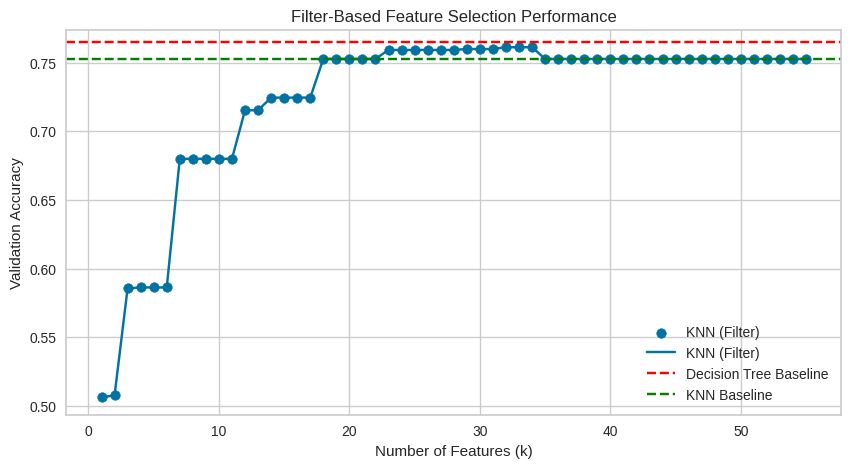

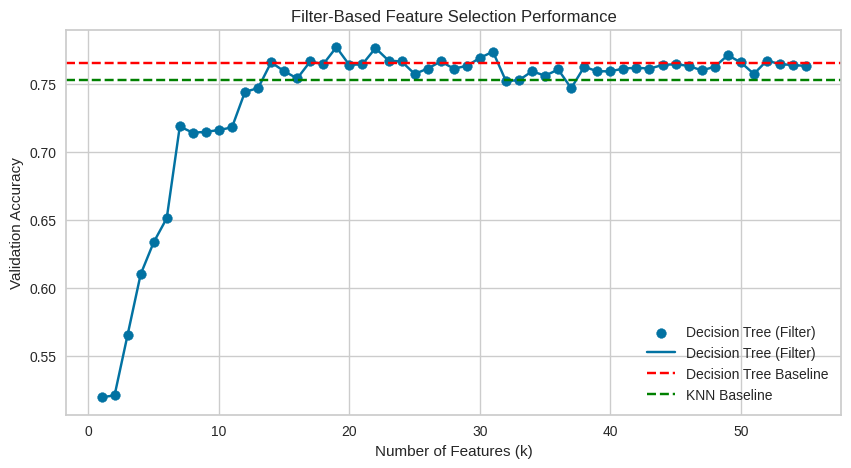

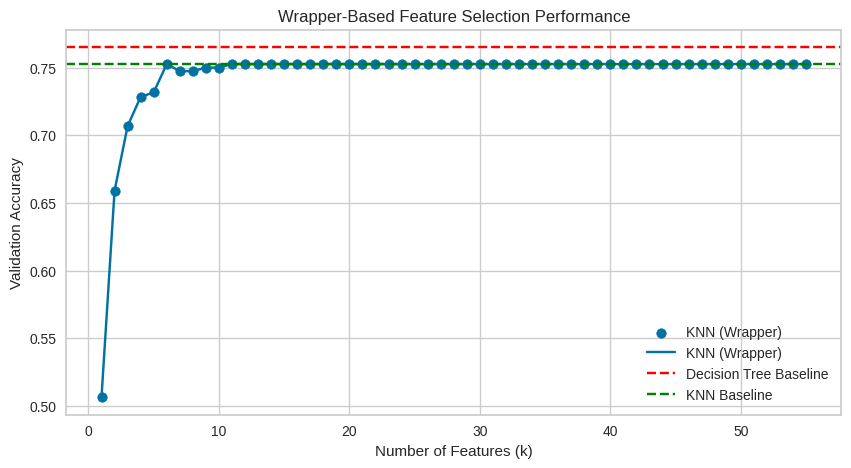

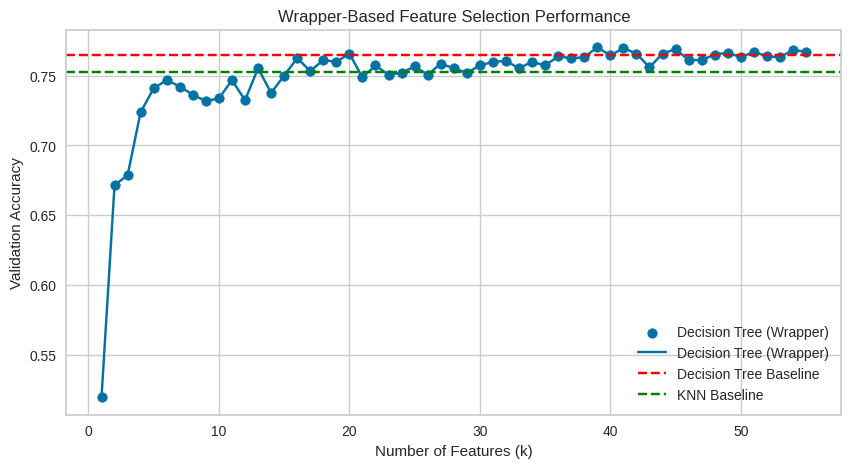

In [ ]:
# Plot the results for filter-based feature selection
plt.figure(figsize=(10, 5))
plt.scatter(range(1, num_features + 1), [filter_accuracy_scores[f'KNN_k={k}'] for k in range(1, num_features + 1)], label="KNN (Filter)")
plt.plot(range(1, num_features + 1), [filter_accuracy_scores[f'KNN_k={k}'] for k in range(1, num_features + 1)], label="KNN (Filter)")
plt.axhline(y=accuracy_scores[best_model_names[0]], linestyle='--', color='red', label=f"{best_model_names[0]} Baseline")
plt.axhline(y=accuracy_scores[best_model_names[1]], linestyle='--', color='green', label=f"{best_model_names[1]} Baseline")
plt.xlabel('Number of Features (k)')
plt.ylabel('Validation Accuracy')
plt.title('Filter-Based Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()

###########################
# Plot the results for filter-based feature selection
plt.figure(figsize=(10, 5))
plt.scatter(range(1, num_features + 1), [filter_accuracy_scores[f'Decision Tree_k={k}'] for k in range(1, num_features + 1)], label="Decision Tree (Filter)")
plt.plot(range(1, num_features + 1), [filter_accuracy_scores[f'Decision Tree_k={k}'] for k in range(1, num_features + 1)], label="Decision Tree (Filter)")
plt.axhline(y=accuracy_scores[best_model_names[0]], linestyle='--', color='red', label=f"{best_model_names[0]} Baseline")
plt.axhline(y=accuracy_scores[best_model_names[1]], linestyle='--', color='green', label=f"{best_model_names[1]} Baseline")
plt.xlabel('Number of Features (k)')
plt.ylabel('Validation Accuracy')
plt.title('Filter-Based Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()
##################################
# Plot the results for wrapper-based feature selection
plt.figure(figsize=(10, 5))
plt.scatter(range(1, num_features + 1), [wrapper_accuracy_scores[f'KNN_k={k}'] for k in range(1, num_features + 1)], label="KNN (Wrapper)")
plt.plot(range(1, num_features + 1), [wrapper_accuracy_scores[f'KNN_k={k}'] for k in range(1, num_features + 1)], label="KNN (Wrapper)")
plt.axhline(y=accuracy_scores[best_model_names[0]], linestyle='--', color='red', label=f"{best_model_names[0]} Baseline")
plt.axhline(y=accuracy_scores[best_model_names[1]], linestyle='--', color='green', label=f"{best_model_names[1]} Baseline")
plt.xlabel('Number of Features (k)')
plt.ylabel('Validation Accuracy')
plt.title('Wrapper-Based Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()

##########################
plt.figure(figsize=(10, 5))
plt.scatter(range(1, num_features + 1), [wrapper_accuracy_scores[f'Decision Tree_k={k}'] for k in range(1, num_features + 1)], label="Decision Tree (Wrapper)")
plt.plot(range(1, num_features + 1), [wrapper_accuracy_scores[f'Decision Tree_k={k}'] for k in range(1, num_features + 1)], label="Decision Tree (Wrapper)")
plt.axhline(y=accuracy_scores[best_model_names[0]], linestyle='--', color='red', label=f"{best_model_names[0]} Baseline")
plt.axhline(y=accuracy_scores[best_model_names[1]], linestyle='--', color='green', label=f"{best_model_names[1]} Baseline")
plt.xlabel('Number of Features (k)')
plt.ylabel('Validation Accuracy')
plt.title('Wrapper-Based Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()







In [ ]:
from sklearn.manifold import TSNE
# Concatenate X_train and X_test for t-SNE visualization
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# t-SNE visualization for training and test sets
tsne = TSNE(n_components=2, random_state=42)

X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Plot the t-SNE visualization for training and test sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 7), alpha=0.5)
plt.title('t-SNE Visualization for Training Set')
plt.colorbar(ticks=range(1, 8), label='Cover Type')

plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap=plt.cm.get_cmap('jet', 7), alpha=0.5)
plt.title('t-SNE Visualization for Test Set')
plt.colorbar(ticks=range(1, 8), label='Cover Type')

plt.tight_layout()
plt.show()

In [ ]:
X_train.shape

(8286, 55)

In [ ]:
ensemble_data_rf_test = []
ensemble_data_rf_val = []
ensemble_data_rf_train = []

flag = 0

# print (filtered_best_models[0])
# print (wrapped_best_models[0])

filtered_best_model_dt.fit (best_X_filter_train_dt,y_train)
filtered_best_model_knn.fit(best_X_filter_train_knn,y_train)
wrapped_best_model_dt.fit (best_X_wrapper_train_dt,y_train)
wrapped_best_model_knn.fit(best_X_wrapper_train_knn,y_train)


ensemble_data_rf_test   = best_X_filter_test_dt
ensemble_data_rf_val    = best_X_filter_val_dt
ensemble_data_rf_train  = best_X_filter_train_dt

# ensemble_data_rf_val = np.column_stack((ensemble_data_rf_val, model.predict(X_val)))
rf_model = RandomForestClassifier()
rf_model.fit(ensemble_data_rf_train, y_train)

# Make final predictions Rf
final_rf_predictions_val = rf_model.predict(ensemble_data_rf_val)
final_rf_predictions_test= rf_model.predict(ensemble_data_rf_test)

y_em1_test_pred = rf_model.predict(ensemble_data_rf_test)
acc1 = accuracy_score(y_test, y_em1_test_pred)

############# Voting ################
voting_estimators = [("Decision Tree", filtered_best_model_dt) , ("KNN",filtered_best_model_knn)]
voting_model = VotingClassifier(estimators=voting_estimators)
voting_model.fit(ensemble_data_rf_train, y_train)

y_em2_test_pred = voting_model.predict(ensemble_data_rf_test)
acc2 = accuracy_score(y_test, y_em2_test_pred)

########### AdaBoost ######################
ada_estimators = [filtered_best_model_dt,filtered_best_model_knn]
ada_model = AdaBoostClassifier()
ada_model.fit(ensemble_data_rf_train, y_train)

y_em3_test_pred = ada_model.predict(ensemble_data_rf_test)
acc3 = accuracy_score(y_test, y_em3_test_pred)
# acc3 = accuracy_score(y_test, y_test_pred)

print("Random Forest Classifier Accuracy:", acc1)
print("voting Classifier Accuracy:", acc2)
print("Boosted Classifier Accuracy:", acc3)

Random Forest Classifier Accuracy: 0.8288524590163935
voting Classifier Accuracy: 0.7718032786885246
Boosted Classifier Accuracy: 0.33967213114754097


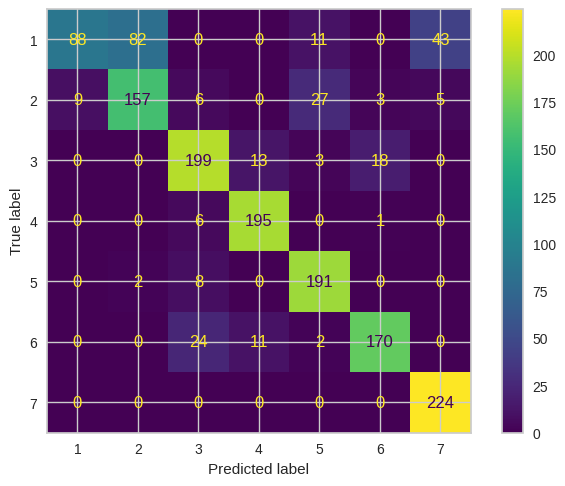

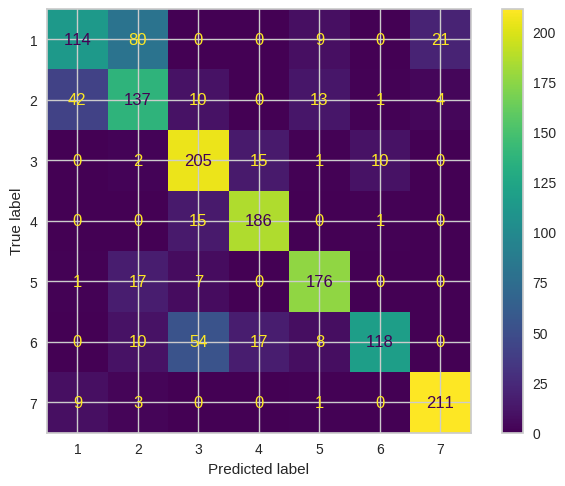

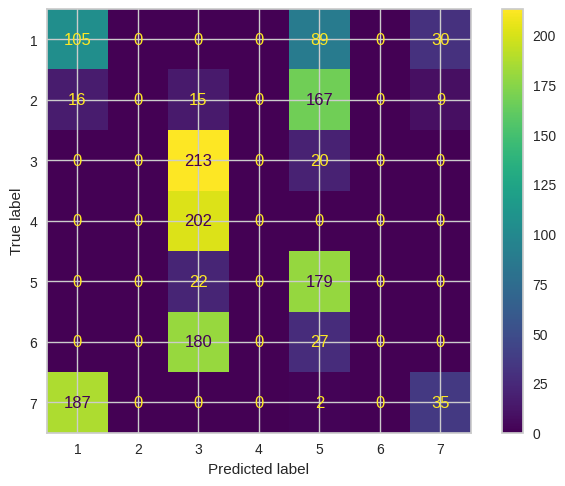

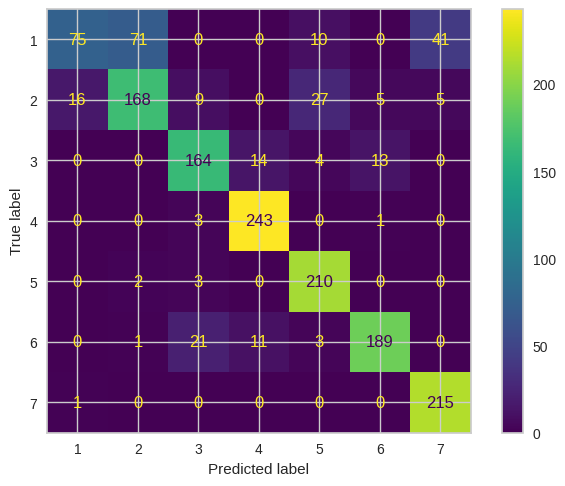

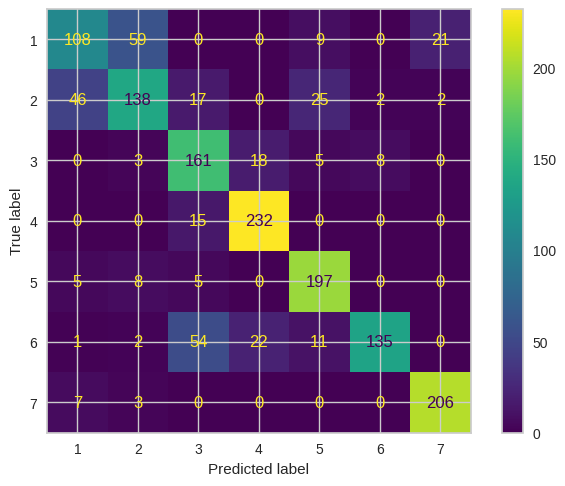

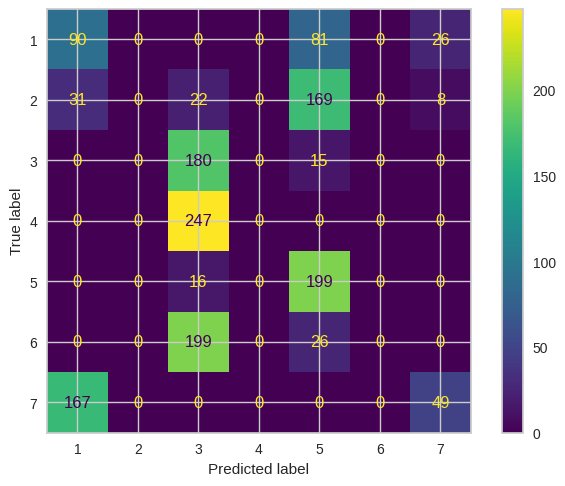

In [ ]:
#############################################
y_true_rf_v, y_pred_rf_v = y_val, rf_model.predict(ensemble_data_rf_val )
y_true_vot_v, y_pred_vot_v = y_val, voting_model.predict(ensemble_data_rf_val)
y_true1_bost_v, y_pred_bost_v = y_val, ada_model.predict(ensemble_data_rf_val)

y_true_rf_t, y_pred_rf_t = y_test, rf_model.predict(ensemble_data_rf_test)
y_true_vot_t, y_pred_vot_t = y_test, voting_model.predict(ensemble_data_rf_test)
y_true1_bost_t, y_pred_bost_t = y_test, ada_model.predict(ensemble_data_rf_test)


########################################

ConfusionMatrixDisplay.from_estimator(rf_model, ensemble_data_rf_val, y_val)
ConfusionMatrixDisplay.from_estimator(voting_model, ensemble_data_rf_val, y_val)
ConfusionMatrixDisplay.from_estimator(ada_model, ensemble_data_rf_val, y_val)


# ####################################
# ConfusionMatrixDisplay.from_estimator(rf_model, ensemble_data_rf_test, y_test)
# ConfusionMatrixDisplay.from_estimator(voting_model, ensemble_data_rf_test, y_test)
# ConfusionMatrixDisplay.from_estimator(ada_model, ensemble_data_rf_test, y_test)


#######################

In [ ]:
print ("Voting Model ")
ConfusionMatrixDisplay.from_estimator(voting_model, ensemble_data_rf_test, y_test)



In [ ]:
print ("Random Forest Model ")
ConfusionMatrixDisplay.from_estimator(rf_model, ensemble_data_rf_test, y_test)


In [ ]:
print ("adaboosting Model ")

ConfusionMatrixDisplay.from_estimator(ada_model, ensemble_data_rf_test, y_test)


# **Question #4**

In [ ]:
!pip install minisom
!pip install sklearn-som

In [ ]:
y_out_train = rf_model.predict(ensemble_data_rf_train)
y_out_test = rf_model.predict(ensemble_data_rf_test)
y_out_val = rf_model.predict(ensemble_data_rf_val)
y_out_train

array([1, 1, 1, ..., 7, 7, 7])

In [ ]:
combined_Y_out_train = pd.concat([pd.DataFrame(y_out_train), pd.DataFrame(y_out_val)], axis=0, ignore_index=True)
combined_Y_out_train.reset_index(drop=True, inplace=True)
combined_Y_out_train.shape

(9784, 1)

In [ ]:
combined_Y_train = pd.concat([y_train, y_val], axis=0, ignore_index=True)
combined_Y_train.reset_index(drop=True, inplace=True)
combined_Y_train

0       1
1       1
2       1
3       1
4       1
       ..
9779    4
9780    2
9781    6
9782    2
9783    2
Name: Cover_Type, Length: 9784, dtype: int64

In [ ]:
combined_X_train = X_train.merge(X_val, how='outer')

# Step 2: Reset the index
combined_X_train.reset_index(drop=True, inplace=True)
combined_X_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      8192       2976      85     23                                95   
1     14089       3104     233     12                               150   
2     10246       3385     160      7                               937   
3      8686       3191      41     14                               210   
4      9242       2821     297      4                                85   
...     ...        ...     ...    ...                               ...   
9779   4257       2062      75     12                                 0   
9780    812       2926      67     12                               324   
9781   7717       2595      98     19                               190   
9782   8662       2820     257     15                               127   
9783  14265       3079     130     22                               297   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 72                             2436   
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
9779                               0                              420   
9780                              45                             3055   
9781                               0                             1883   
9782                              23                             2496   
9783                              81                             1781   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type31  \
0               246             193             64  ...            0   
1               200             251            186  ...            0   
2               228             242            147  ...            1   
3               221             208            119  ...            0   
4               208             238            169  ...            0   
...             ...             ...            ...  ...          ...   
9779            234             217            113  ...            0   
9780            232             217            116  ...            0   
9781            248             209             81  ...            0   
9782            183             248            202  ...            0   
9783            250             221             87  ...            0   

      Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               1            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
9779            0            0            0            0            0   
9780            0            0            0            0            0   
9781            0            0            0            0            0   
9782            0            0            0            0            0   
9783            0            1            0            0            0   

      Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0               0            0            0            0  
1               0            0            0            0  
2               0            0            0            0  
3               0            0            0            0  
4               0            0            0            0  
...           ...          ...          ...          ...  
9779            0            0            0            0  
9780            0

In [ ]:
y_out_super = combined_Y_out_train.stack().reset_index(drop=True)
y_out_super


0       1
1       1
2       1
3       1
4       1
       ..
9779    4
9780    2
9781    6
9782    2
9783    2
Length: 9784, dtype: int64

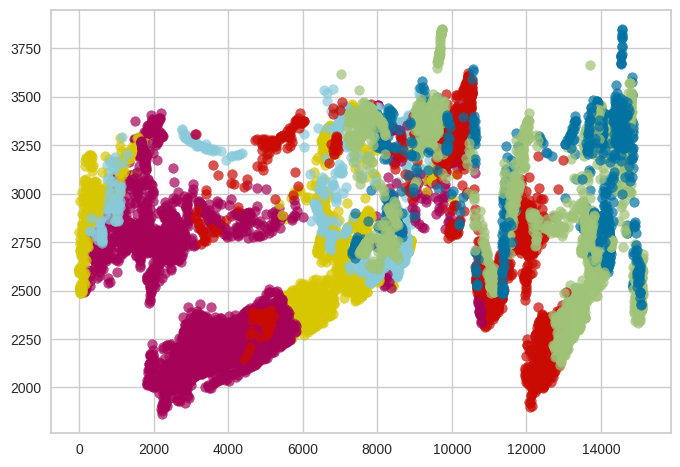

Epoch 1/50
306/306 [==============================] - 3s 3ms/step - loss: 0.5533 - accuracy: 0.8308
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 1.1062 - accuracy: 0.5776
Epoch 3/50
306/306 [==============================] - 1s 2ms/step - loss: 0.8021 - accuracy: 0.7164
Epoch 4/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3595 - accuracy: 0.8933
Epoch 5/50
306/306 [==============================] - 2s 5ms/step - loss: 0.4685 - accuracy: 0.8706
Epoch 6/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1711 - accuracy: 0.9720
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.9720
Epoch 8/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9720
Epoch 10/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1479 - accuracy: 0.9720

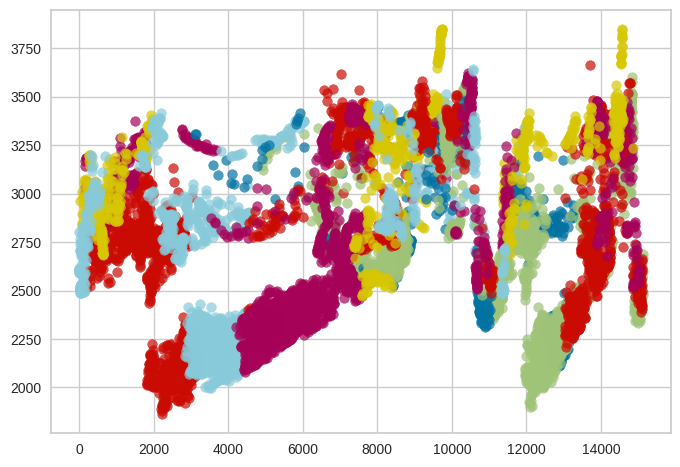

Epoch 1/50
306/306 [==============================] - 4s 4ms/step - loss: 0.7651 - accuracy: 0.7598
Epoch 2/50
306/306 [==============================] - 1s 4ms/step - loss: 0.4103 - accuracy: 0.8888
Epoch 3/50
306/306 [==============================] - 1s 4ms/step - loss: 0.6195 - accuracy: 0.8022
Epoch 4/50
306/306 [==============================] - 1s 4ms/step - loss: 0.5041 - accuracy: 0.8576
Epoch 5/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1685 - accuracy: 0.9718
Epoch 6/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3762 - accuracy: 0.8932
Epoch 7/50
306/306 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.8490
Epoch 8/50
306/306 [==============================] - 3s 8ms/step - loss: 0.1532 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1500 - accuracy: 0.9720
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1473 - accuracy: 0.9720

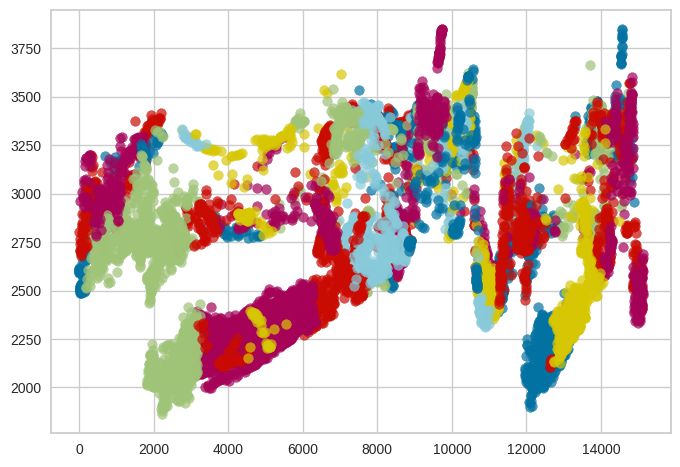

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.6623 - accuracy: 0.7699
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8931
Epoch 3/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3878 - accuracy: 0.9042
Epoch 4/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.8920
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.9067
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5003 - accuracy: 0.8666
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 1.8555 - accuracy: 0.2236
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 1.0226 - accuracy: 0.5862
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4758 - accuracy: 0.8656
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.9531 - accuracy: 0.6527

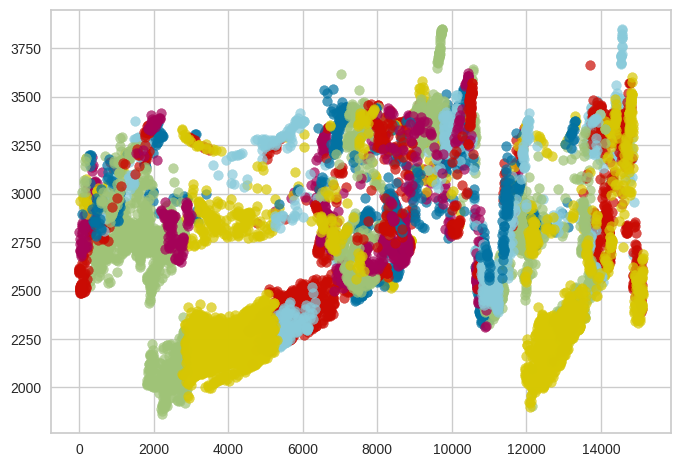

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.7922 - accuracy: 0.7208
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.9025
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.9555
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 1.1671 - accuracy: 0.5677
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5041 - accuracy: 0.8706
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 1.6426 - accuracy: 0.3675
Epoch 7/50
306/306 [==============================] - 1s 2ms/step - loss: 0.9784 - accuracy: 0.6165
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5770 - accuracy: 0.8226
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.9558
Epoch 10/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1546 - accuracy: 0.9719

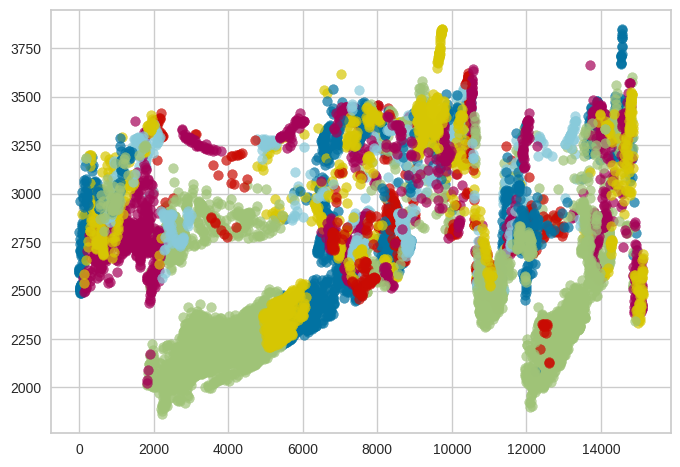

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.7516 - accuracy: 0.7545
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.8775
Epoch 3/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3618 - accuracy: 0.9100
Epoch 4/50
306/306 [==============================] - 1s 4ms/step - loss: 0.4467 - accuracy: 0.8803
Epoch 5/50
306/306 [==============================] - 1s 4ms/step - loss: 0.5506 - accuracy: 0.8432
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.9114
Epoch 7/50
306/306 [==============================] - 1s 4ms/step - loss: 0.2554 - accuracy: 0.9387
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1501 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9720
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9720

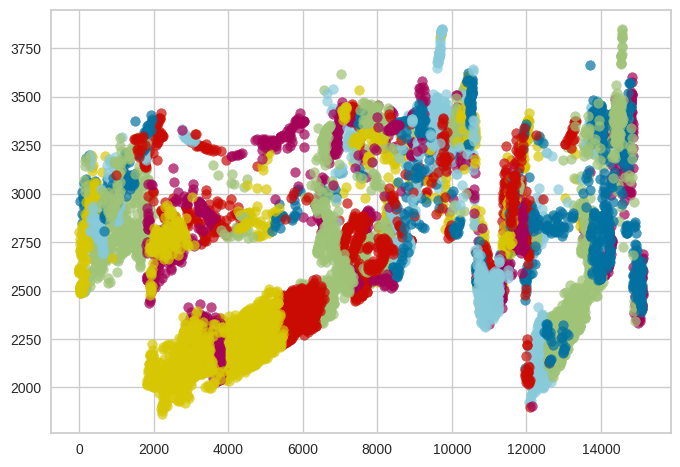

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.9261 - accuracy: 0.6531
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.8190
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6219 - accuracy: 0.8083
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7768 - accuracy: 0.7298
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 1.1078 - accuracy: 0.6255
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 1.4035 - accuracy: 0.4644
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 1.1942 - accuracy: 0.5673
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8922
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9719
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1583 - accuracy: 0.9720

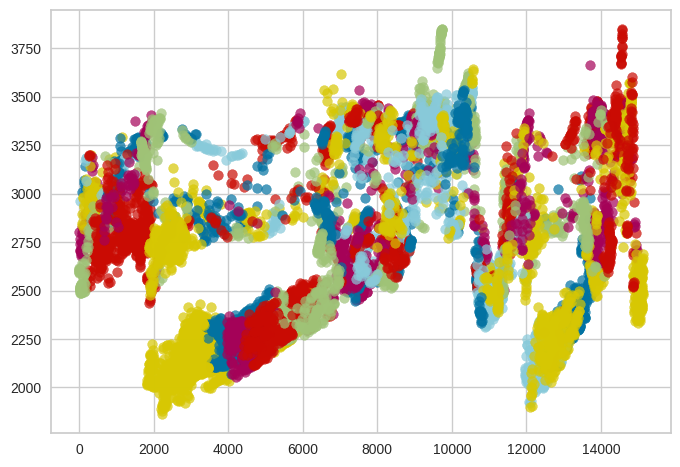

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.9049 - accuracy: 0.6687
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6368 - accuracy: 0.7882
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8076 - accuracy: 0.7576
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4521 - accuracy: 0.8597
Epoch 5/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8967
Epoch 6/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1926 - accuracy: 0.9604
Epoch 7/50
306/306 [==============================] - 1s 4ms/step - loss: 0.8904 - accuracy: 0.6737
Epoch 8/50
306/306 [==============================] - 1s 4ms/step - loss: 1.5510 - accuracy: 0.3554
Epoch 9/50
306/306 [==============================] - 1s 4ms/step - loss: 1.5096 - accuracy: 0.3856
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8472 - accuracy: 0.7086

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Find the best number of clusters using SOFM (MiniSom)
# Define the grid sizes for SOFM
sofm_grid_sizes = [6, 7, 8, 9, 10, 11, 12]
best_accuracy = 0
best_sofm = None
accuracy_list = []

xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

for grid_size in sofm_grid_sizes:
    som_shape = (grid_size, grid_size)
    som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1])
    # som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
    som.random_weights_init(xtrain)
    # som.train_random(xtrain, num_iteration=100)
    som.train_batch(xtrain, 400)
    winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
    cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
    for c in np.unique(cluster_train):
      plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
    plt.show()

    pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})

    # Implement the DNN model as the PKI Strategy
    model = tf.keras.Sequential()
    model.add(Dense(30, input_dim = 2, activation='tanh'))  # First hidden layer
    model.add(Dense(30, activation='tanh'))  # Second hidden layer
    model.add(Dense(30, activation='tanh'))  # Third hidden layer
    model.add(Dense(30, activation='tanh'))  # Fourth hidden layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Convert the labels to one-hot encoded vectors for multi-class classification
    y_train_encoded = pd.get_dummies(combined_Y_train)
    y_test_encoded  = pd.get_dummies(y_test)

    # Train the DNN model
    result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1, workers=-1)


    ######################################  testing  ################################################
    winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
    cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)


    pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

    _, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

    # Evaluate the DNN model with the PKI Strategy
    print(f"Grid Size: {grid_size}x{grid_size}, Accuracy: {accuracy1}")
    accuracy_list.append(accuracy1)
    # Save the best SOFM model based on accuracy
    if accuracy1 >= best_accuracy:
        best_accuracy = accuracy1
        best_sofm = som

# Print the best grid size and its accuracy
best_grid_size_index = np.argmax(accuracy_list)
best_grid_size = sofm_grid_sizes[best_grid_size_index]
print(f"Best Grid Size: {best_grid_size}x{best_grid_size}, Best Accuracy: {best_accuracy}")

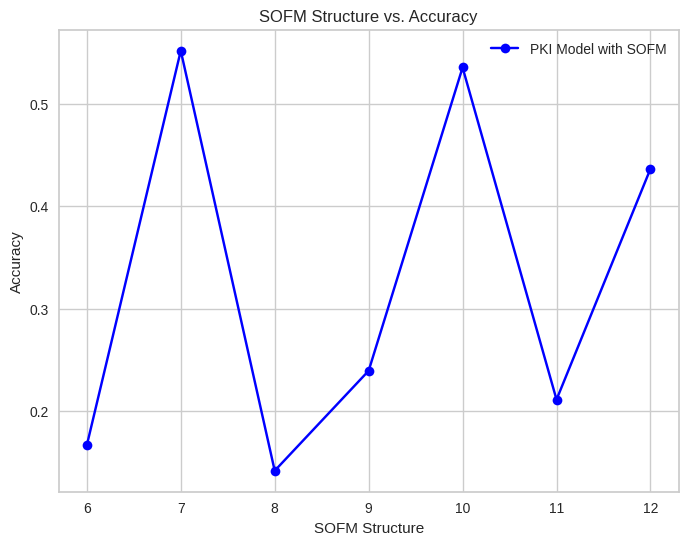

In [ ]:
# Plot the number of neurons in the SOFM structure vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(sofm_grid_sizes, accuracy_list, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM')
#plt.axhline(y=best_accuracy, color='red', linestyle='--', label='Second Improvement (Q3)')
plt.xlabel('SOFM Structure')
plt.ylabel('Accuracy')
plt.title('SOFM Structure vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

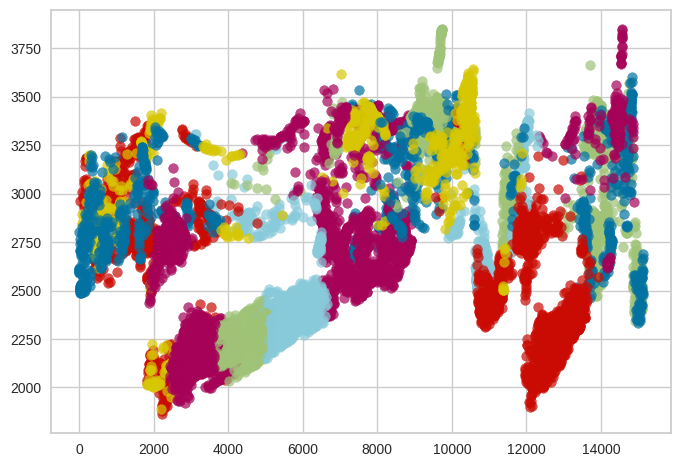

Epoch 1/50
306/306 [==============================] - 2s 2ms/step - loss: 0.5593 - accuracy: 0.8345
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 0.3104 - accuracy: 0.9259
Epoch 3/50
306/306 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.8616
Epoch 4/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1546 - accuracy: 0.9720
Epoch 5/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9720
Epoch 6/50
306/306 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.9100
Epoch 7/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9720
Epoch 8/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1469 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3910 - accuracy: 0.9026
Epoch 10/50
306/306 [==============================] - 2s 7ms/step - loss: 0.2364 - accuracy: 0.9245

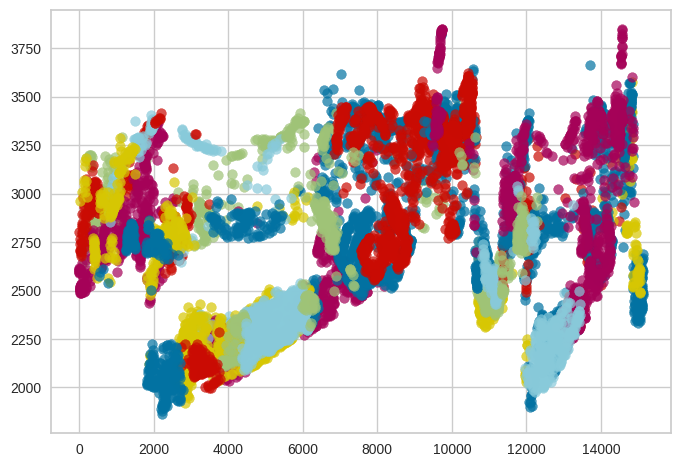

Epoch 1/50
306/306 [==============================] - 2s 2ms/step - loss: 0.5660 - accuracy: 0.8274
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8635 - accuracy: 0.7179
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6025 - accuracy: 0.8133
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8874
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.9293
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1534 - accuracy: 0.9720
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6125 - accuracy: 0.8012
Epoch 8/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1578 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1478 - accuracy: 0.9720
Epoch 10/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9720

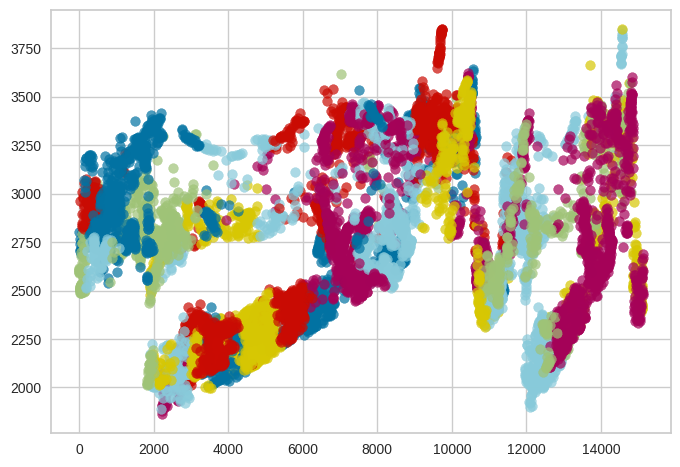

Epoch 1/50
306/306 [==============================] - 3s 4ms/step - loss: 0.7209 - accuracy: 0.7531
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2479 - accuracy: 0.9454
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.9409
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.9105
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1502 - accuracy: 0.9720
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5888 - accuracy: 0.8262
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5348 - accuracy: 0.8322
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1625 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1516 - accuracy: 0.9720
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7882 - accuracy: 0.7260

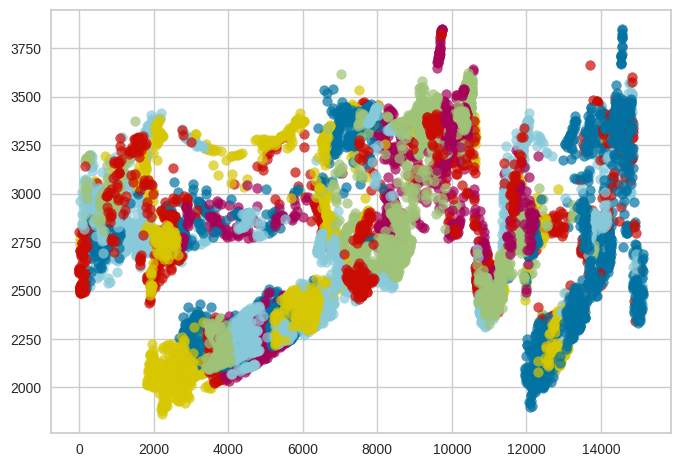

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.6782 - accuracy: 0.7787
Epoch 2/50
306/306 [==============================] - 1s 4ms/step - loss: 0.3875 - accuracy: 0.9024
Epoch 3/50
306/306 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.8557
Epoch 4/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1536 - accuracy: 0.9718
Epoch 5/50
306/306 [==============================] - 1s 4ms/step - loss: 0.5704 - accuracy: 0.8565
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 1.0084 - accuracy: 0.6199
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 1.2643 - accuracy: 0.4899
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6615 - accuracy: 0.7906
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1920 - accuracy: 0.9719
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7846 - accuracy: 0.7448

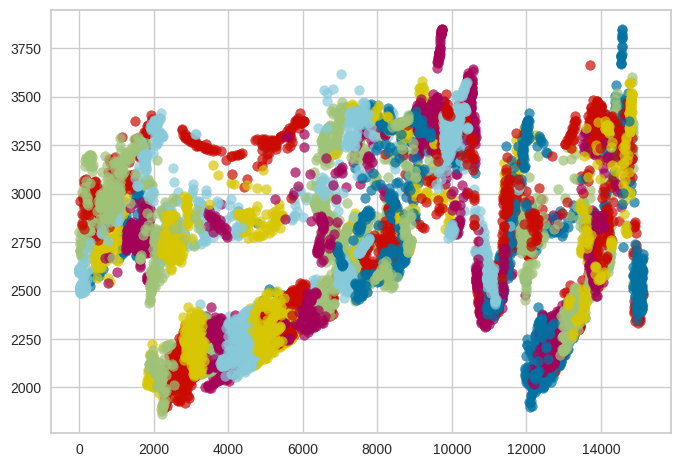

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.8456 - accuracy: 0.7050
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7295 - accuracy: 0.7671
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5439 - accuracy: 0.8488
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2704 - accuracy: 0.9334
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7788 - accuracy: 0.7491
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6654 - accuracy: 0.7795
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8929 - accuracy: 0.6922
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 1.3618 - accuracy: 0.4655
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 1.8254 - accuracy: 0.2324
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 1.8527 - accuracy: 0.2186

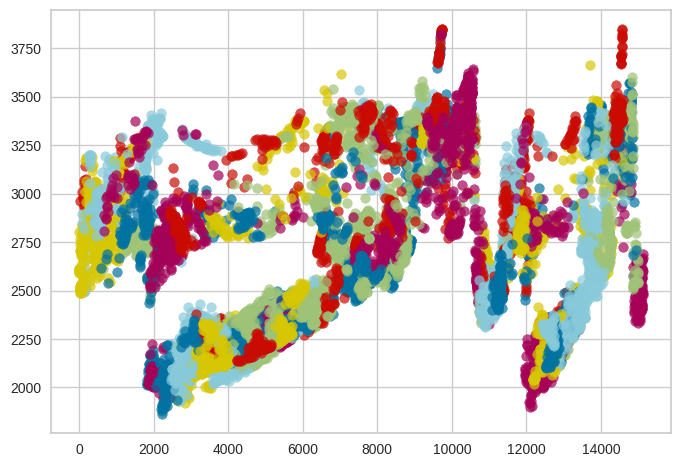

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.9562 - accuracy: 0.6425
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 0.6630 - accuracy: 0.7987
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 1.0368 - accuracy: 0.6238
Epoch 4/50
306/306 [==============================] - 1s 4ms/step - loss: 0.5492 - accuracy: 0.8225
Epoch 5/50
306/306 [==============================] - 1s 4ms/step - loss: 0.5198 - accuracy: 0.8456
Epoch 6/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1825 - accuracy: 0.9717
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 1.0561 - accuracy: 0.6362
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7927 - accuracy: 0.7260
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 1.0841 - accuracy: 0.6013
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8546 - accuracy: 0.6964

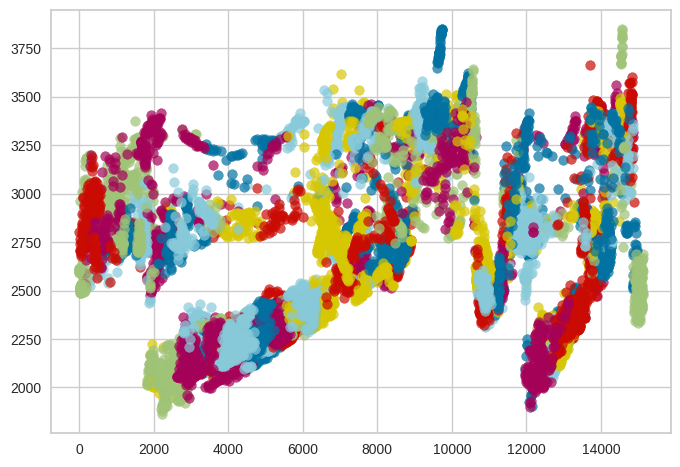

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 1.0123 - accuracy: 0.6126
Epoch 2/50
306/306 [==============================] - 1s 3ms/step - loss: 1.1368 - accuracy: 0.6214
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.8736 - accuracy: 0.7017
Epoch 4/50
306/306 [==============================] - 1s 2ms/step - loss: 0.5978 - accuracy: 0.8367
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.7002 - accuracy: 0.7740
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.9074
Epoch 7/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.8687
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 0.9494 - accuracy: 0.6471
Epoch 9/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.8489
Epoch 10/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1589 - accuracy: 0.9719

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Find the best number of clusters using SOFM (MiniSom)
# Define the grid sizes for SOFM
sofm_grid_sizes = [6, 7, 8, 9, 10, 11, 12]
best_accuracy = 0
best_sofm = None
accuracy_list = []

xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

for grid_size in sofm_grid_sizes:
    som_shape = (grid_size, grid_size)
    som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
    som.random_weights_init(xtrain)
    # som.train_random(xtrain, num_iteration=100)
    som.train_batch(xtrain, 400)
    winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
    cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
    for c in np.unique(cluster_train):
      plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
    plt.show()

    pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})

    # Implement the DNN model as the PKI Strategy
    model = tf.keras.Sequential()
    model.add(Dense(30, input_dim = 2, activation='tanh'))  # First hidden layer
    model.add(Dense(30, activation='tanh'))  # Second hidden layer
    model.add(Dense(30, activation='tanh'))  # Third hidden layer
    model.add(Dense(30, activation='tanh'))  # Fourth hidden layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Convert the labels to one-hot encoded vectors for multi-class classification
    y_train_encoded = pd.get_dummies(combined_Y_train)
    y_test_encoded  = pd.get_dummies(y_test)

    # Train the DNN model
    result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1,workers=-1)


    ######################################  testing  ################################################
    winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
    cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)


    pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

    _, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

    # Evaluate the DNN model with the PKI Strategy
    print(f"Grid Size: {grid_size}x{grid_size}, Accuracy: {accuracy1}")
    accuracy_list.append(accuracy1)
    # Save the best SOFM model based on accuracy
    if accuracy1 >= best_accuracy:
        best_accuracy = accuracy1
        best_sofm = som

# Print the best grid size and its accuracy
best_grid_size_index = np.argmax(accuracy_list)
best_grid_size = sofm_grid_sizes[best_grid_size_index]
print(f"Best Grid Size: {best_grid_size}x{best_grid_size}, Best Accuracy: {best_accuracy}")

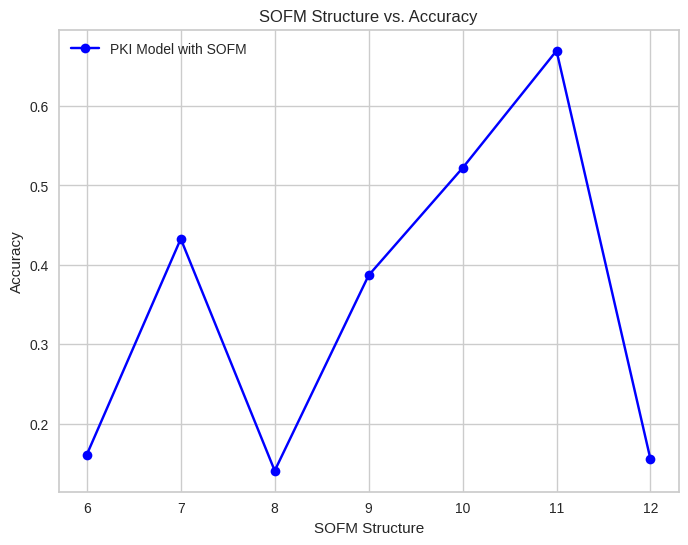

In [ ]:
# Plot the number of neurons in the SOFM structure vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(sofm_grid_sizes, accuracy_list, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM')
#plt.axhline(y=best_accuracy, color='red', linestyle='--', label='Second Improvement (Q3)')
plt.xlabel('SOFM Structure')
plt.ylabel('Accuracy')
plt.title('SOFM Structure vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Question #4 Neurons**

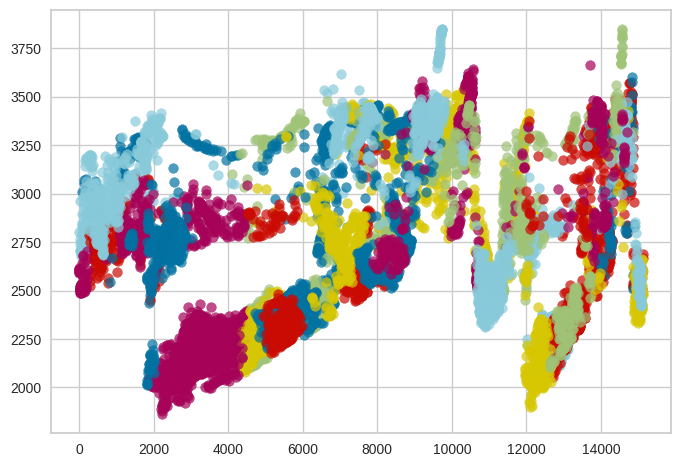

Epoch 1/50
306/306 [==============================] - 3s 4ms/step - loss: 0.5593 - accuracy: 0.8402
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2792 - accuracy: 0.9288
Epoch 3/50
306/306 [==============================] - 1s 2ms/step - loss: 0.4993 - accuracy: 0.8466
Epoch 4/50
306/306 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.9158
Epoch 5/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1599 - accuracy: 0.9720
Epoch 6/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9720
Epoch 7/50
306/306 [==============================] - 1s 2ms/step - loss: 0.8970 - accuracy: 0.6820
Epoch 8/50
306/306 [==============================] - 1s 3ms/step - loss: 1.6705 - accuracy: 0.3241
Epoch 9/50
306/306 [==============================] - 2s 5ms/step - loss: 0.6588 - accuracy: 0.7639
Epoch 10/50
306/306 [==============================] - 2s 5ms/step - loss: 0.8717 - accuracy: 0.6911

In [ ]:
num_of_neurons = [25, 30, 40, 45, 50, 55, 60, 70]
best_accuracy = 0
best_sofm = None
accuracy_list = []

xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

som_shape = (best_grid_size, best_grid_size)
som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
som.random_weights_init(xtrain)
# som.train_random(xtrain, num_iteration=100)
som.train_batch(xtrain, 400)
winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
for c in np.unique(cluster_train):
  plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
plt.show()

pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})
pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

for neuron in num_of_neurons:

    # Implement the DNN model as the PKI Strategy
    model = tf.keras.Sequential()
    model.add(Dense(neuron, input_dim = 2, activation='tanh'))  # First hidden layer
    model.add(Dense(neuron, activation='tanh'))  # Second hidden layer
    model.add(Dense(neuron, activation='tanh'))  # Third hidden layer
    model.add(Dense(neuron, activation='tanh'))  # Fourth hidden layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Convert the labels to one-hot encoded vectors for multi-class classification
    y_train_encoded = pd.get_dummies(combined_Y_train)
    y_test_encoded  = pd.get_dummies(y_test)

    # Train the DNN model
    result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1,workers=-1)

    ######################################  testing  ################################################
    winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
    cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)

    _, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

    # Evaluate the DNN model with the PKI Strategy
    print(f"Neuron Number: {neuron}, Accuracy: {accuracy1}")
    accuracy_list.append(accuracy1)
    # Save the best SOFM model based on accuracy
    if accuracy1 >= best_accuracy:
        best_accuracy = accuracy1
        # best_sofm = som

# Print the best grid size and its accuracy
best_neuron_size_index = np.argmax(accuracy_list)
best_neuron_size = num_of_neurons[best_neuron_size_index]
print(f"Best neuron Size: {best_neuron_size}, Best Accuracy: {best_accuracy}")

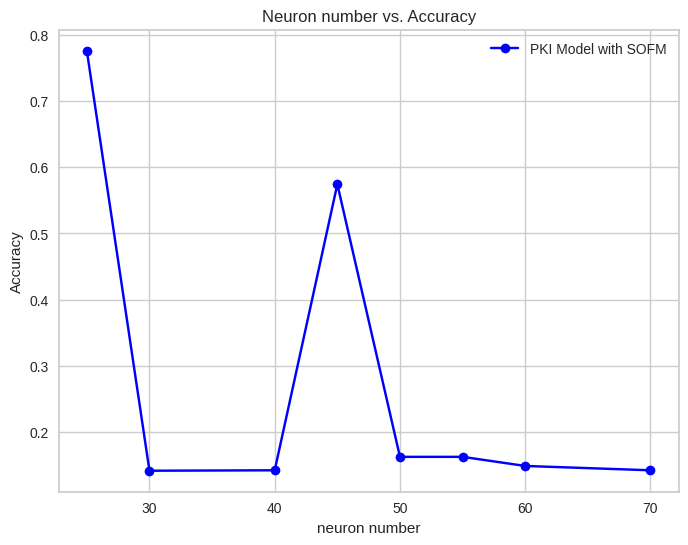

In [ ]:
# Plot the number of neurons in the SOFM structure vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(num_of_neurons, accuracy_list, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM')
#plt.axhline(y=best_accuracy, color='red', linestyle='--', label='Second Improvement (Q3)')
plt.xlabel('neuron number')
plt.ylabel('Accuracy')
plt.title('Neuron number vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Question #5**

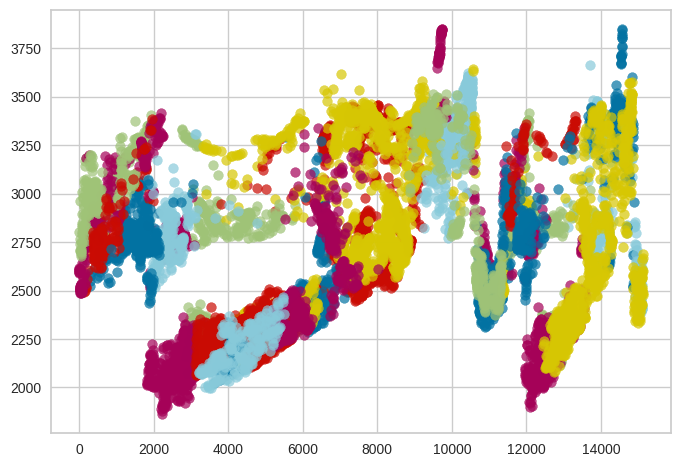

Epoch 1/50
306/306 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.8172
Epoch 2/50
306/306 [==============================] - 2s 5ms/step - loss: 0.2561 - accuracy: 0.9409
Epoch 3/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1578 - accuracy: 0.9720
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.4548 - accuracy: 0.8927
Epoch 5/50
306/306 [==============================] - 1s 3ms/step - loss: 0.5153 - accuracy: 0.8472
Epoch 6/50
306/306 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.9142
Epoch 7/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1599 - accuracy: 0.9719
Epoch 8/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 2ms/step - loss: 1.1827 - accuracy: 0.5609
Epoch 10/50
306/306 [==============================] - 1s 2ms/step - loss: 1.8766 - accuracy: 0.2068

In [ ]:
xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

som_shape = (best_grid_size, best_grid_size)
som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
som.random_weights_init(xtrain)
# som.train_random(xtrain, num_iteration=100)
som.train_batch(xtrain, 400)
winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
for c in np.unique(cluster_train):
  plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
plt.show()

pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})
pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

neuron = 25

# Implement the DNN model as the PKI Strategy
model = tf.keras.Sequential()
model.add(Dense(neuron, input_dim = 2, activation='tanh'))  # First hidden layer
model.add(Dense(neuron, activation='tanh'))  # Second hidden layer
model.add(Dense(neuron, activation='tanh'))  # Third hidden layer
model.add(Dense(neuron, activation='tanh'))  # Fourth hidden layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Convert the labels to one-hot encoded vectors for multi-class classification
y_train_encoded = pd.get_dummies(combined_Y_train)
y_test_encoded  = pd.get_dummies(y_test)

# Train the DNN model
result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1,workers=-1)

######################################  testing  ################################################
winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)

_, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

# Evaluate the DNN model with the PKI Strategy
print(f"Neuron Number: {neuron}, Accuracy: {accuracy1}")
accuracy_list_layers.append(accuracy1)
# Save the best SOFM model based on accuracy
if accuracy1 >= best_accuracy:
    best_accuracy = accuracy1
    # best_sofm = som
layer_No.append(4)
# Print the best grid size and its accuracy
best_neuron_size_index = np.argmax(accuracy_list_layers)
best_neuron_size = num_of_neurons[best_neuron_size_index]
print(f"Best layer Number: {4}, Best Accuracy: {best_accuracy}")

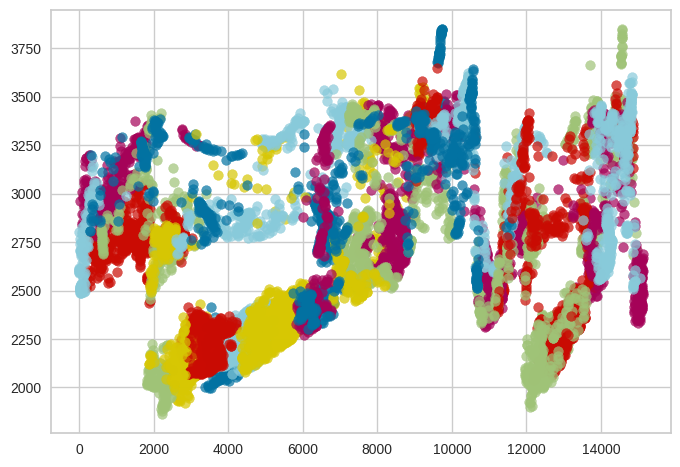

Epoch 1/50
306/306 [==============================] - 2s 3ms/step - loss: 0.6406 - accuracy: 0.8118
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2625 - accuracy: 0.9467
Epoch 3/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2968 - accuracy: 0.9286
Epoch 4/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.9715
Epoch 5/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.9303
Epoch 6/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1865 - accuracy: 0.9673
Epoch 7/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2619 - accuracy: 0.9441
Epoch 8/50
306/306 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8947
Epoch 9/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9719
Epoch 10/50
306/306 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.9230

In [ ]:
xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

som_shape = (best_grid_size, best_grid_size)
som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
som.random_weights_init(xtrain)
# som.train_random(xtrain, num_iteration=100)
som.train_batch(xtrain, 400)
winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
for c in np.unique(cluster_train):
  plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
plt.show()

pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})
pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

neuron = 25

# Implement the DNN model as the PKI Strategy
model = tf.keras.Sequential()
model.add(Dense(neuron, input_dim = 2, activation='tanh'))  # First hidden layer
model.add(Dense(neuron, activation='tanh'))  # Second hidden layer
model.add(Dense(neuron, activation='tanh'))  # Third hidden layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Convert the labels to one-hot encoded vectors for multi-class classification
y_train_encoded = pd.get_dummies(combined_Y_train)
y_test_encoded  = pd.get_dummies(y_test)

# Train the DNN model
result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1,workers=-1)

######################################  testing  ################################################
winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)

_, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

# Evaluate the DNN model with the PKI Strategy
print(f"Neuron Number: {neuron}, Accuracy: {accuracy1}")
accuracy_list_layers.append(accuracy1)
# Save the best SOFM model based on accuracy
if accuracy1 >= best_accuracy:
    best_accuracy = accuracy1
    # best_sofm = som
layer_No.append(3)
# Print the best grid size and its accuracy
best_neuron_size_index = np.argmax(accuracy_list_layers)
best_neuron_size = num_of_neurons[best_neuron_size_index]
print(f"Best layer Number: {3}, Best Accuracy: {best_accuracy}")

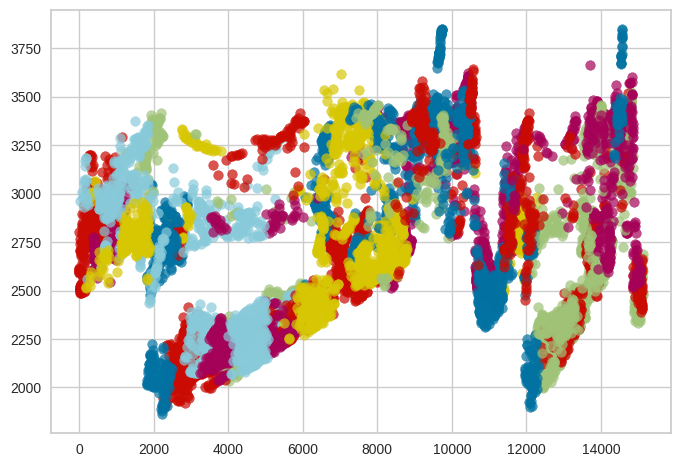

Epoch 1/50
306/306 [==============================] - 2s 2ms/step - loss: 0.8176 - accuracy: 0.7705
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.9577
Epoch 3/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1878 - accuracy: 0.9703
Epoch 4/50
306/306 [==============================] - 1s 3ms/step - loss: 0.1700 - accuracy: 0.9700
Epoch 5/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2310 - accuracy: 0.9550
Epoch 6/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1606 - accuracy: 0.9705
Epoch 7/50
306/306 [==============================] - 2s 7ms/step - loss: 0.2222 - accuracy: 0.9496
Epoch 8/50
306/306 [==============================] - 2s 6ms/step - loss: 0.1500 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1831 - accuracy: 0.9593
Epoch 10/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1496 - accuracy: 0.9719

In [ ]:
best_accuracy = 0
best_sofm = None
accuracy_list_layers = []
layer_No=[]
xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

som_shape = (best_grid_size, best_grid_size)
som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
som.random_weights_init(xtrain)
# som.train_random(xtrain, num_iteration=100)
som.train_batch(xtrain, 400)
winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
for c in np.unique(cluster_train):
  plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
plt.show()

pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})
pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

neuron = best_neuron_size

# Implement the DNN model as the PKI Strategy
model = tf.keras.Sequential()
model.add(Dense(neuron, input_dim = 2, activation='tanh'))  # First hidden layer
model.add(Dense(neuron, activation='tanh'))  # Second hidden layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Convert the labels to one-hot encoded vectors for multi-class classification
y_train_encoded = pd.get_dummies(combined_Y_train)
y_test_encoded  = pd.get_dummies(y_test)

# Train the DNN model
result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1,workers=-1)

######################################  testing  ################################################
winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)

_, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

# Evaluate the DNN model with the PKI Strategy
print(f"Neuron Number: {neuron}, Accuracy: {accuracy1}")
accuracy_list_layers.append(accuracy1)
# Save the best SOFM model based on accuracy
if accuracy1 >= best_accuracy:
    best_accuracy = accuracy1
layer_No.append(2)
print(f"Best layer Number: {2}, Best Accuracy: {best_accuracy}")

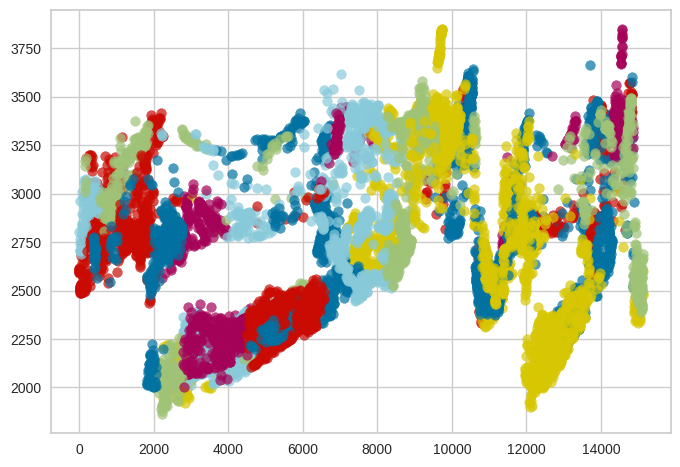

Epoch 1/50
306/306 [==============================] - 2s 2ms/step - loss: 0.7713 - accuracy: 0.7259
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.9344
Epoch 3/50
306/306 [==============================] - 1s 2ms/step - loss: 0.1654 - accuracy: 0.9689
Epoch 4/50
306/306 [==============================] - 1s 2ms/step - loss: 1.1971 - accuracy: 0.5634
Epoch 5/50
306/306 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.9217
Epoch 6/50
306/306 [==============================] - 1s 4ms/step - loss: 1.2779 - accuracy: 0.5236
Epoch 7/50
306/306 [==============================] - 1s 4ms/step - loss: 0.2911 - accuracy: 0.9400
Epoch 8/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9720
Epoch 9/50
306/306 [==============================] - 2s 5ms/step - loss: 0.2027 - accuracy: 0.9593
Epoch 10/50
306/306 [==============================] - 2s 6ms/step - loss: 0.9203 - accuracy: 0.6574

In [ ]:
xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

som_shape = (7, 7)
som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
som.random_weights_init(xtrain)
# som.train_random(xtrain, num_iteration=100)
som.train_batch(xtrain, 400)
winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
for c in np.unique(cluster_train):
  plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
plt.show()

pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})
pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

neuron = 25

# Implement the DNN model as the PKI Strategy
model = tf.keras.Sequential()
model.add(Dense(neuron, input_dim = 2, activation='tanh'))  # First hidden layer
model.add(Dense(neuron, activation='tanh'))  # Second hidden layer
model.add(Dense(neuron, activation='tanh'))  # Third hidden layer
model.add(Dense(neuron, activation='tanh'))  # Fourth hidden layer
model.add(Dense(neuron, activation='tanh'))  # Fifth hidden layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Convert the labels to one-hot encoded vectors for multi-class classification
y_train_encoded = pd.get_dummies(combined_Y_train)
y_test_encoded  = pd.get_dummies(y_test)

# Train the DNN model
result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1,workers=-1)

######################################  testing  ################################################
winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)

_, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

# Evaluate the DNN model with the PKI Strategy
print(f"Neuron Number: {neuron}, Accuracy: {accuracy1}")
accuracy_list_layers.append(accuracy1)
# Save the best SOFM model based on accuracy
if accuracy1 >= best_accuracy:
    best_accuracy = accuracy1
    # best_sofm = som
layer_No.append(5)
# Print the best grid size and its accuracy
best_neuron_size_index = np.argmax(accuracy_list_layers)
best_neuron_size = num_of_neurons[best_neuron_size_index]
print(f"Best layer Number: {5}, Best Accuracy: {best_accuracy}")

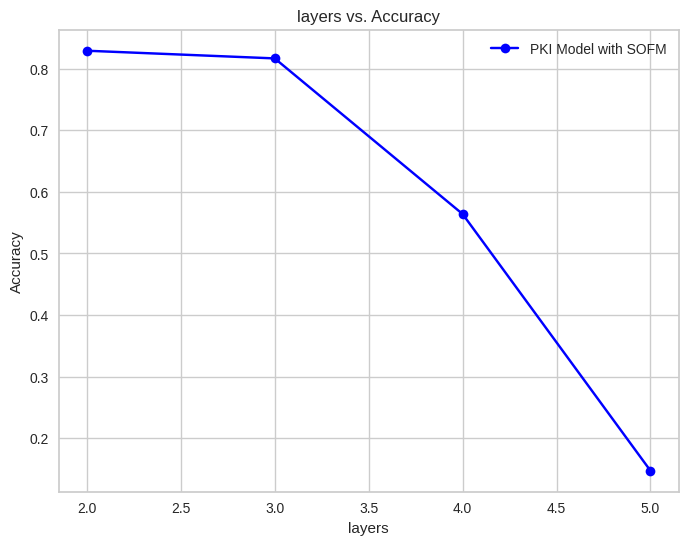

In [ ]:
# Plot the number of neurons in the SOFM structure vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(layer_No, accuracy_list_layers, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM')
#plt.axhline(y=best_accuracy, color='red', linestyle='--', label='Second Improvement (Q3)')
plt.xlabel('layers')
plt.ylabel('Accuracy')
plt.title('layers vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Draft**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# Find the best number of clusters using SOFM (MiniSom)
# Define the grid sizes for SOFM
sofm_grid_sizes = [6, 7, 8, 9, 10, 11, 12]
best_accuracy = 0
best_sofm = None
accuracy_list = []

xtrain = np.array(combined_X_train)
xtest = np.array(X_test)

for grid_size in sofm_grid_sizes:
    som_shape = (grid_size, grid_size)
    som = MiniSom(som_shape[0], som_shape[1], xtrain.shape[1], sigma=0.5, learning_rate=0.001)
    som.random_weights_init(xtrain)
    # som.train_random(xtrain, num_iteration=100)
    som.train_batch(xtrain, 400)
    winning_neurons_train = np.array([som.winner(x) for x in xtrain]).T
    cluster_train = np.ravel_multi_index(winning_neurons_train, som_shape)
    for c in np.unique(cluster_train):
      plt.scatter(xtrain[cluster_train == c, 0],xtrain[cluster_train == c, 1], label='cluster='+str(c), alpha=.7)
    plt.show()

    pki_df = pd.DataFrame({'Y_out_train':y_out_super, 'Y_cluster_train': cluster_train})

    # Implement the DNN model as the PKI Strategy
    model = tf.keras.Sequential()
    model.add(Dense(30, input_dim = 2, activation='tanh'))  # First hidden layer
    model.add(Dense(30, activation='tanh'))  # Second hidden layer
    model.add(Dense(30, activation='tanh'))  # Third hidden layer
    model.add(Dense(30, activation='tanh'))  # Fourth hidden layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Convert the labels to one-hot encoded vectors for multi-class classification
    y_train_encoded = pd.get_dummies(combined_Y_train)
    y_test_encoded  = pd.get_dummies(y_test)

    # Train the DNN model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
    result = model.fit(pki_df, y_train_encoded, epochs=50, batch_size=32, verbose=1, callbacks=[es],workers=-1)
    # history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=400, verbose=0, callbacks=[es])

    ######################################  testing  ################################################
    winning_neurons_test = np.array([som.winner(x) for x in xtest]).T
    cluster_test = np.ravel_multi_index(winning_neurons_test, som_shape)


    pki_df_test = pd.DataFrame({'Y_out_test': y_out_test, 'Y_cluster_train': cluster_test})

    _, accuracy1 = model.evaluate(pki_df_test, y_test_encoded, verbose=1)

    # Evaluate the DNN model with the PKI Strategy
    print(f"Grid Size: {grid_size}x{grid_size}, Accuracy: {accuracy1}")
    accuracy_list.append(accuracy1)
    # Save the best SOFM model based on accuracy
    if accuracy1 >= best_accuracy:
        best_accuracy = accuracy1
        best_sofm = som

# Print the best grid size and its accuracy
best_grid_size_index = np.argmax(accuracy_list)
best_grid_size = sofm_grid_sizes[best_grid_size_index]
print(f"Best Grid Size: {best_grid_size}x{best_grid_size}, Best Accuracy: {best_accuracy}")